# Data Preprocessing

*1. Import Libraries and Load Data*

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 读取数据
train_data = pd.read_csv('Train.csv')
validate_data = pd.read_csv('Validate.csv')
test_data = pd.read_csv('Test.csv')

print(train_data.head())
print(validate_data.head())
print(test_data.head())


   ID  Married  Gender  Age  Graduate     Profession  Years_of_Working   \
0   0        1     1.0   36       NaN         Artist                9.0   
1   1        0     1.0   49       1.0         Artist                1.0   
2   2        0     NaN   25       0.0      Homemaker                8.0   
3   3        1     0.0   77       1.0         Lawyer                0.0   
4   4        1     0.0   39       1.0  Entertainment                1.0   

  Spending_Score  Family_Members Category Class(Target)  
0            Low             2.0    Cat_6             C  
1            Low             1.0    Cat_6             A  
2            Low             1.0    Cat_3             B  
3           High             2.0    Cat_4             A  
4        Average             4.0    Cat_3             A  
     ID  Married  Gender  Age  Graduate Profession  Years_of_Working   \
0  7487        0     0.0   36       1.0     Doctor               13.0   
1  7488        1     0.0   43       0.0  Executive     

*2. Data Cleaning and Feature Engineering*
* Handle missing values.
* Encode categorical variables.
* Scale features.


In [56]:
# Check missing values distribution
print("Missing values in train data:")
print(train_data.isnull().sum())

# Calculate percentage of missing values for each column
missing_percentages = (train_data.isnull().sum() / len(train_data)) * 100
print("\nMissing value percentages:")
print(missing_percentages)

# Remove columns with more than 50% missing values
columns_to_drop = missing_percentages[missing_percentages > 50].index
train_data = train_data.drop(columns=columns_to_drop, axis=1)
validate_data = validate_data.drop(columns=columns_to_drop, axis=1)
test_data = test_data.drop(columns=columns_to_drop, axis=1)

# For remaining missing values, fill with appropriate strategy
# Numeric columns: fill with median
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    validate_data[col] = validate_data[col].fillna(train_data[col].median())
    test_data[col] = test_data[col].fillna(train_data[col].median())

# Categorical columns: fill with mode
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    validate_data[col] = validate_data[col].fillna(train_data[col].mode()[0])
    

# Print the shape of data after cleaning
print("\nShape of data after cleaning:")
print(f"Train data shape: {train_data.shape}")
print(f"Validate data shape: {validate_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Verify no missing values remain
print("\nRemaining missing values in train data:")
print(train_data.isnull().sum().sum())

Missing values in train data:
ID                     0
Married                0
Gender               130
Age                    0
Graduate              77
Profession           112
Years_of_Working     742
Spending_Score         0
Family_Members       310
Category              72
Class(Target)          0
dtype: int64

Missing value percentages:
ID                   0.000000
Married              0.000000
Gender               1.736343
Age                  0.000000
Graduate             1.028449
Profession           1.495926
Years_of_Working     9.910512
Spending_Score       0.000000
Family_Members       4.140510
Category             0.961667
Class(Target)        0.000000
dtype: float64

Shape of data after cleaning:
Train data shape: (7487, 11)
Validate data shape: (1069, 11)
Test data shape: (2139, 11)

Remaining missing values in train data:
0


Analyzing Feature Distributions...


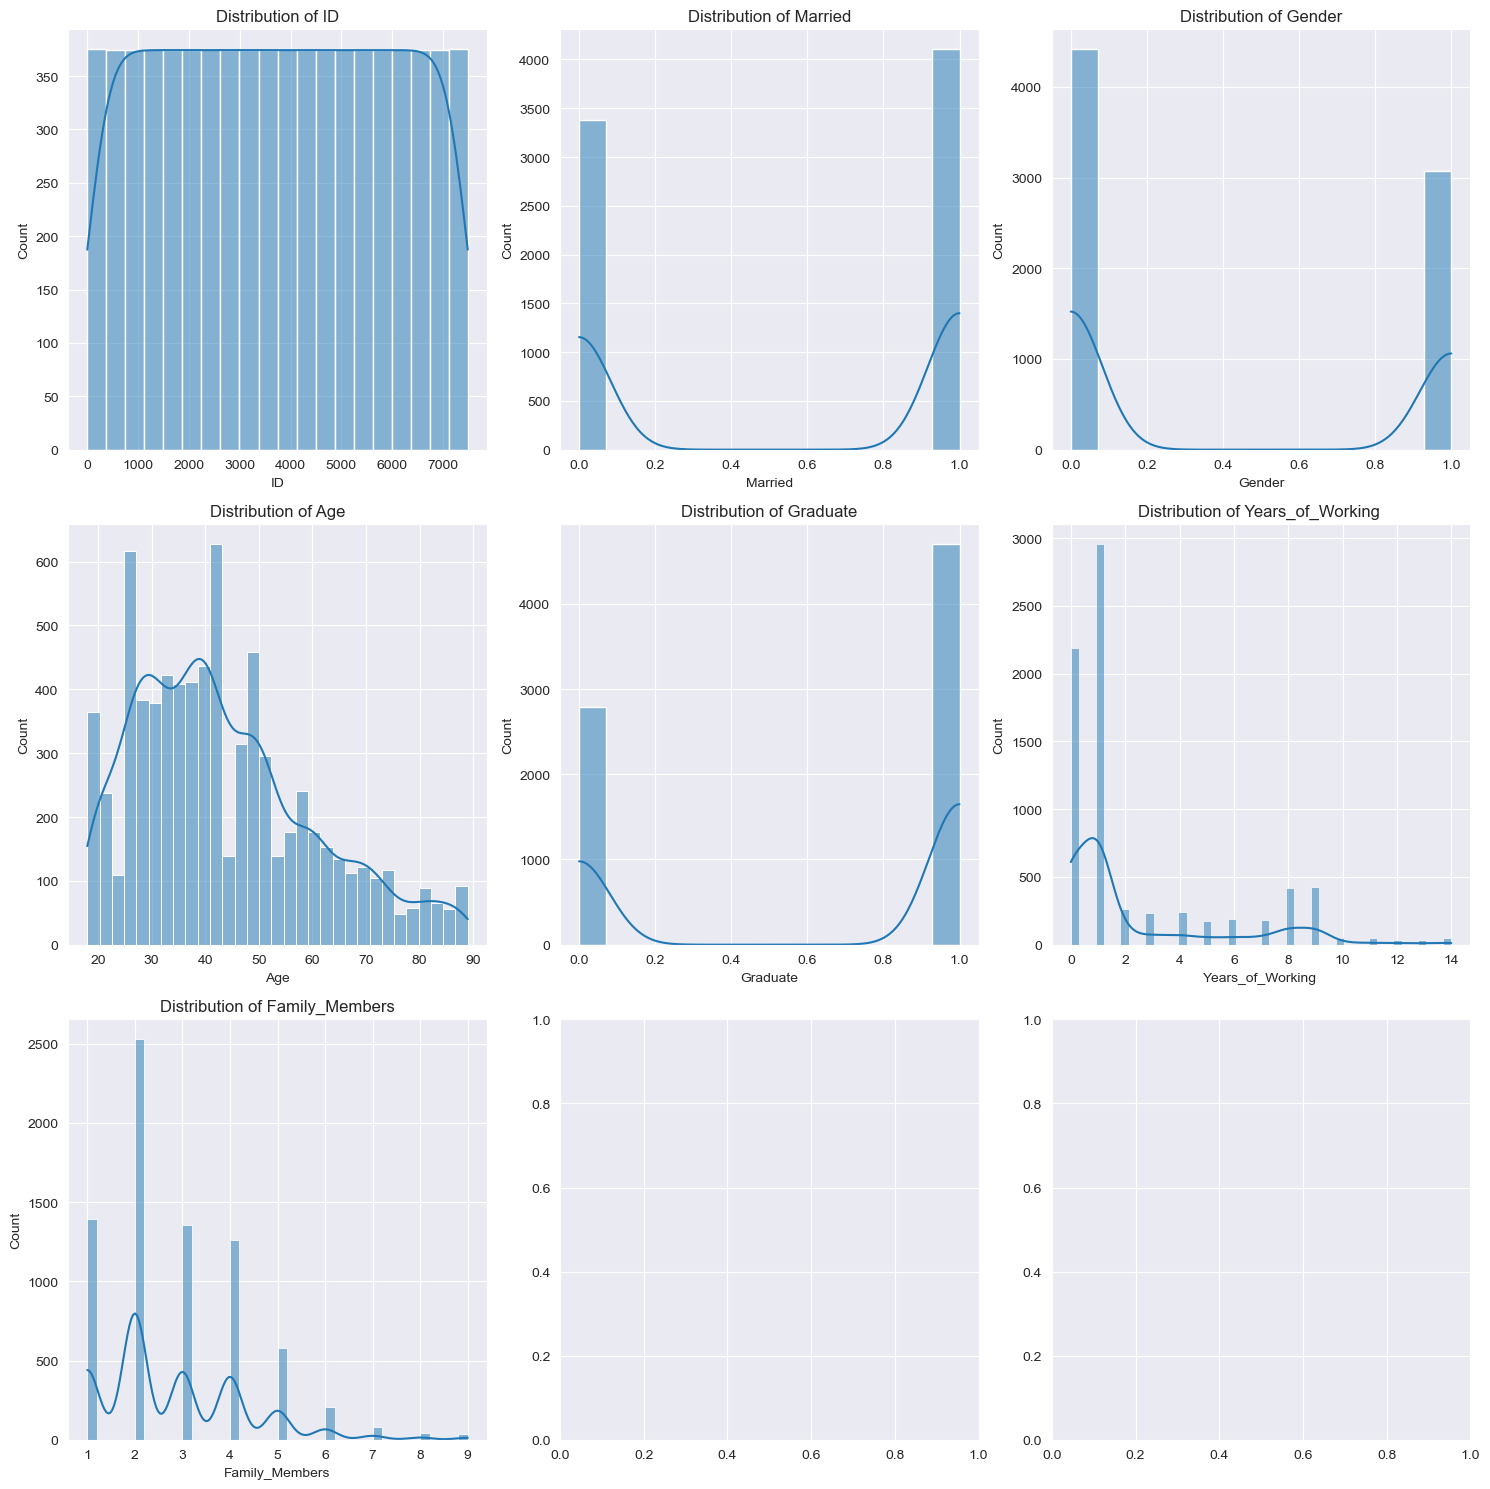

/var/folders/7k/2_vr7fps6s96llmfhn4tjg1c0000gn/T/ipykernel_87908/1780465094.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
/var/folders/7k/2_vr7fps6s96llmfhn4tjg1c0000gn/T/ipykernel_87908/1780465094.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
/var/folders/7k/2_vr7fps6s96llmfhn4tjg1c0000gn/T/ipykernel_87908/1780465094.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
/var/folders/7k/2_vr7fps6s96llmfhn4tjg1c0000gn/T/ipykernel_87908/1780465094.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of t

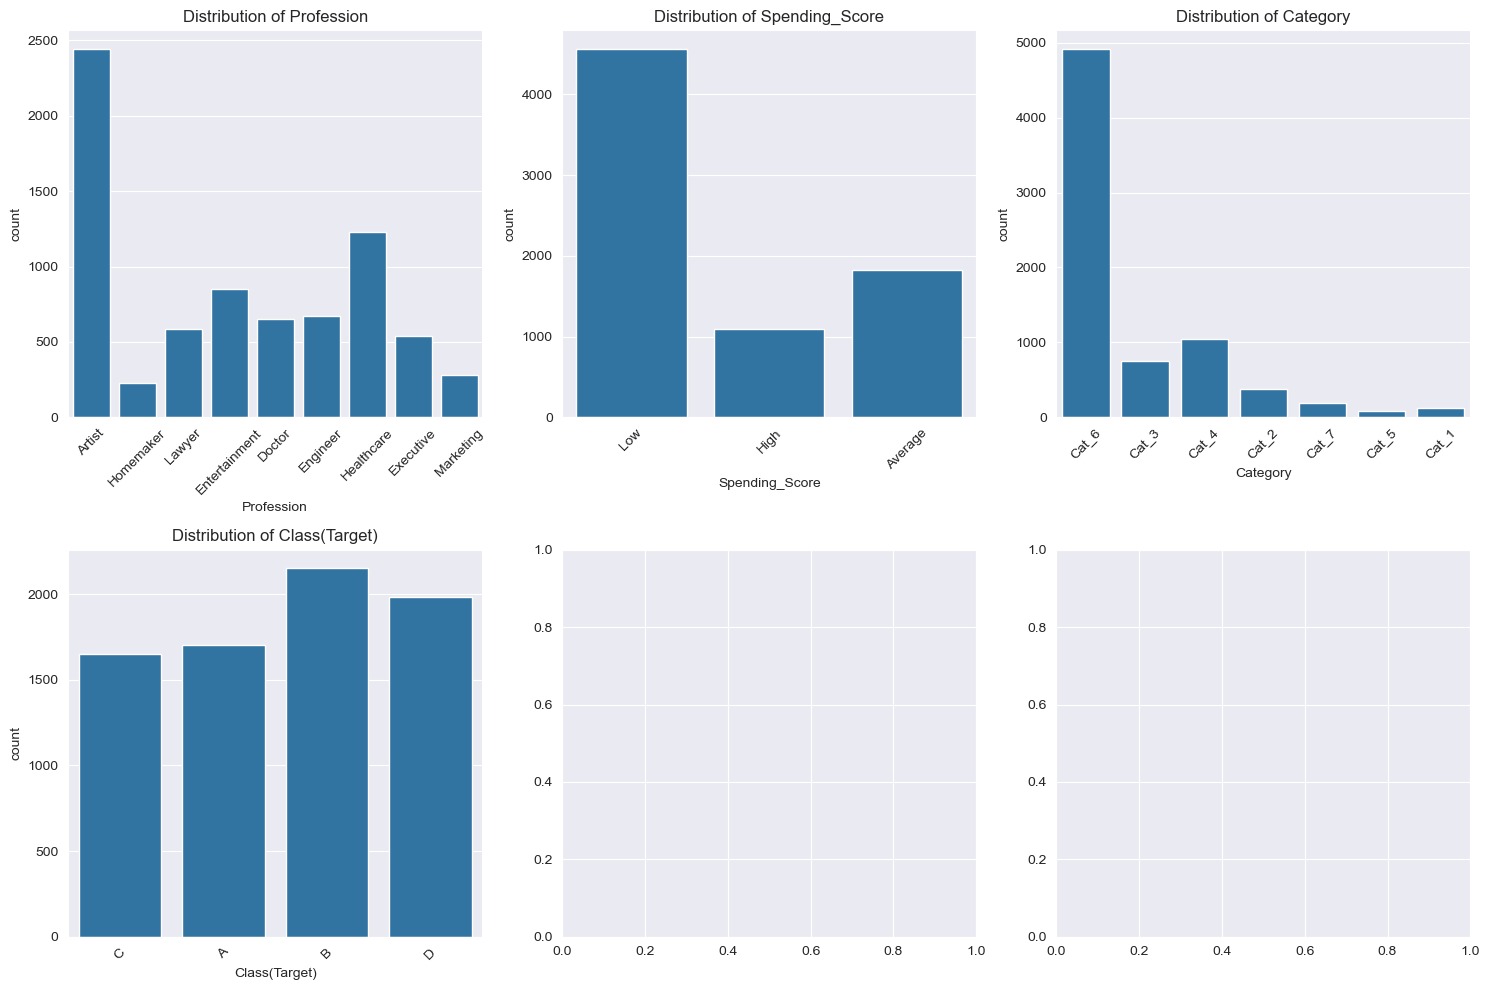


Analyzing Feature Correlations...


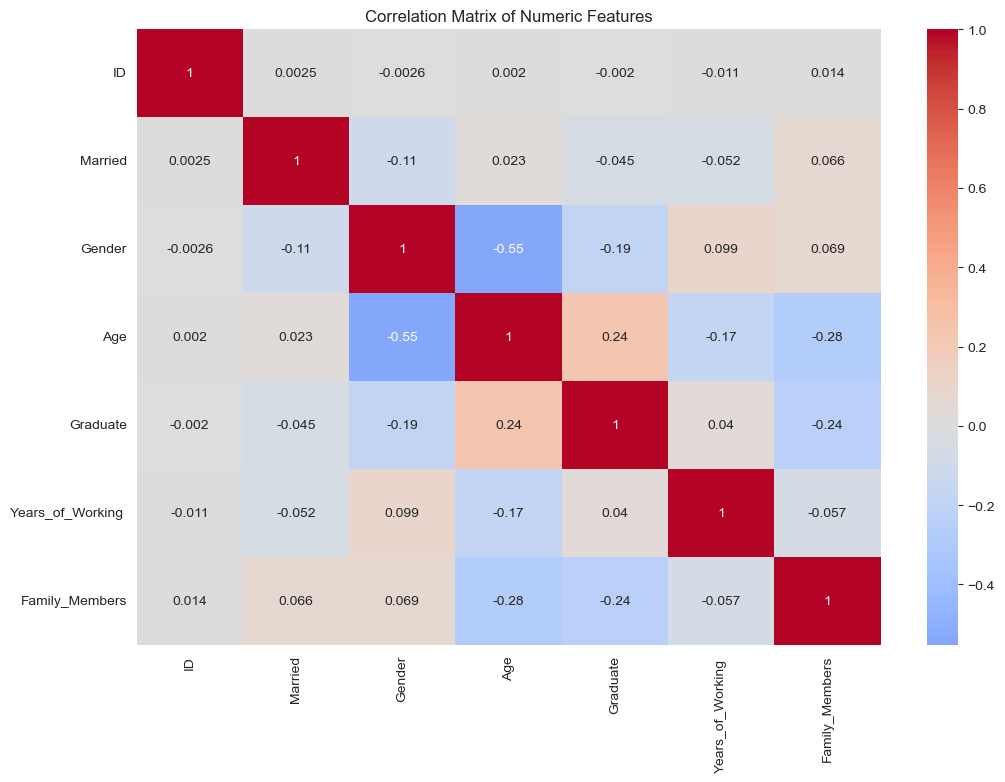


High correlations (|correlation| > 0.5):
Gender -- Age: -0.554

Analyzing Relationships with Target Variable...


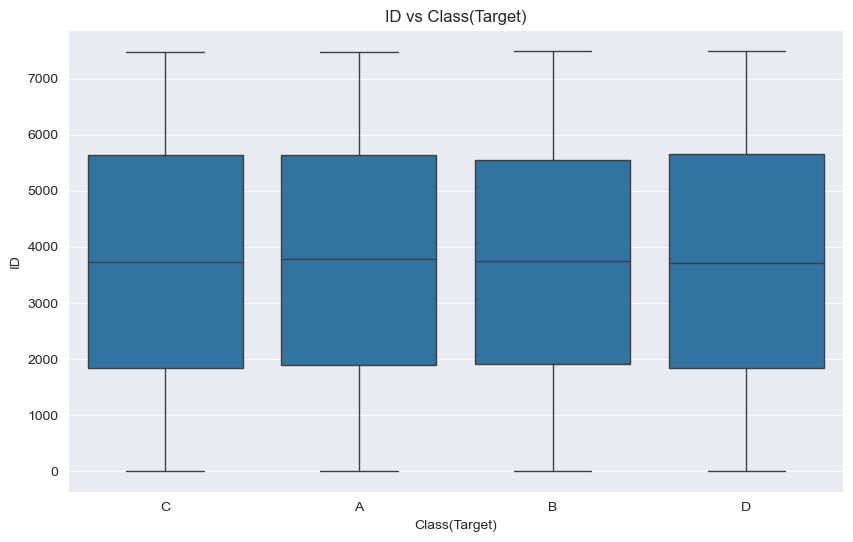

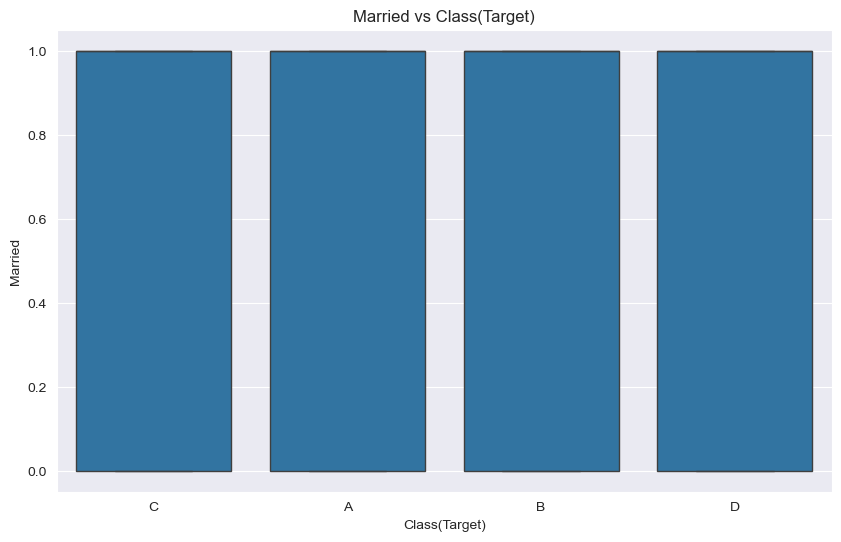

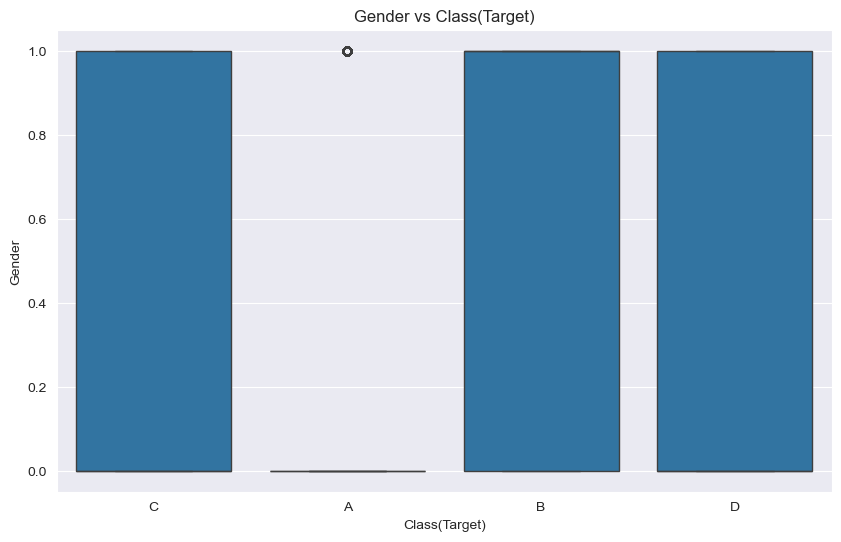

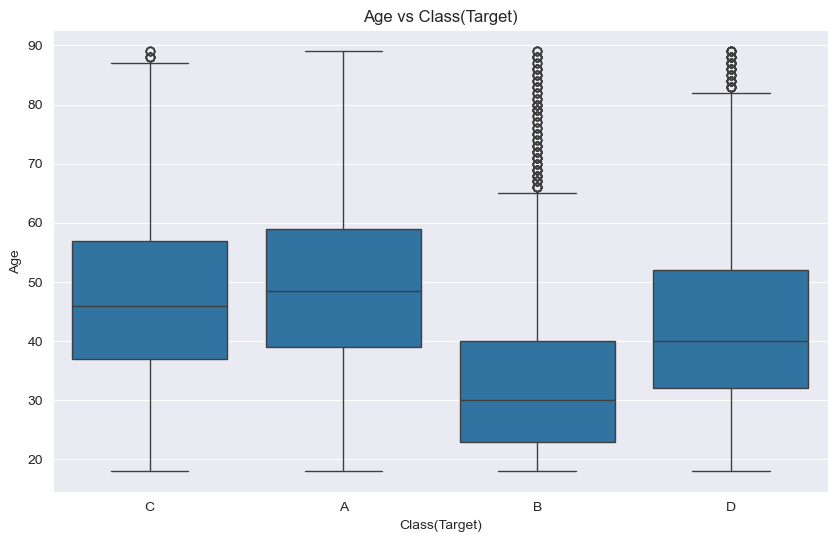

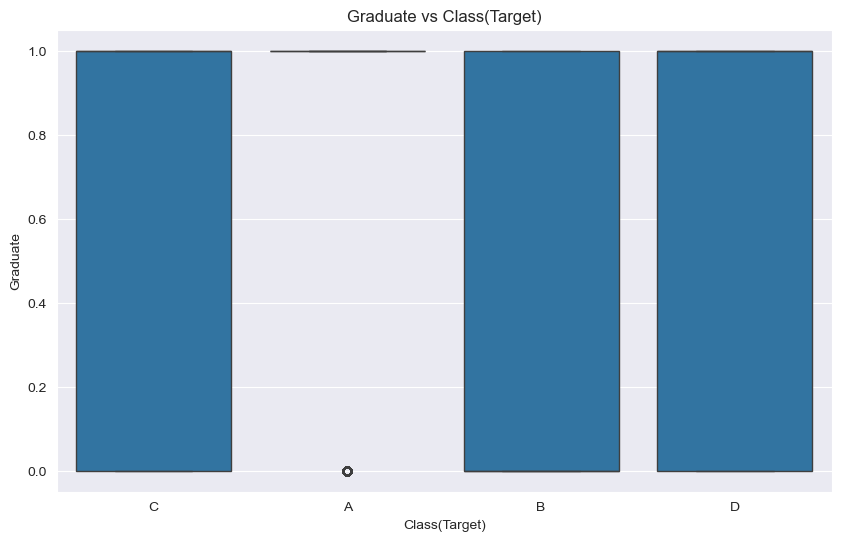

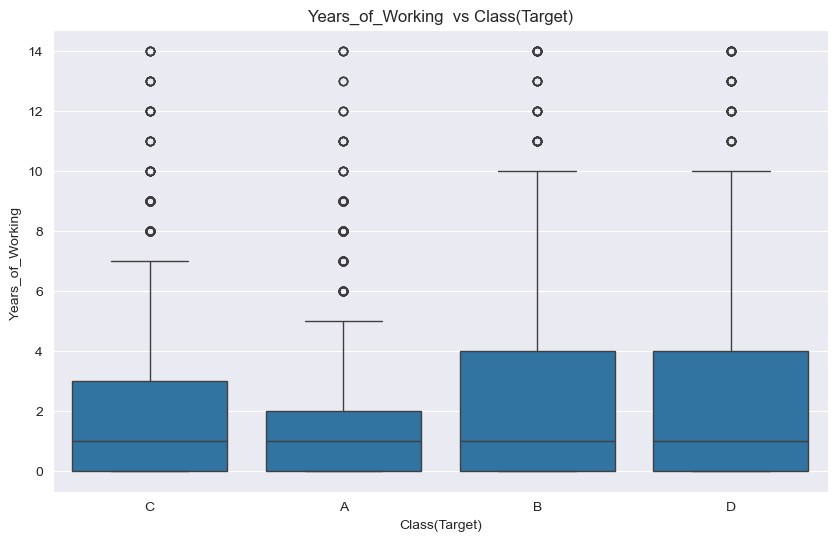

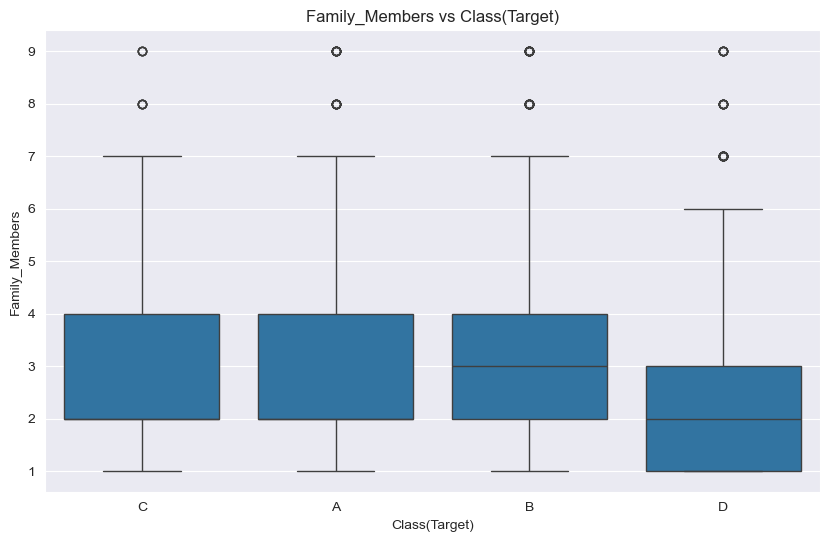

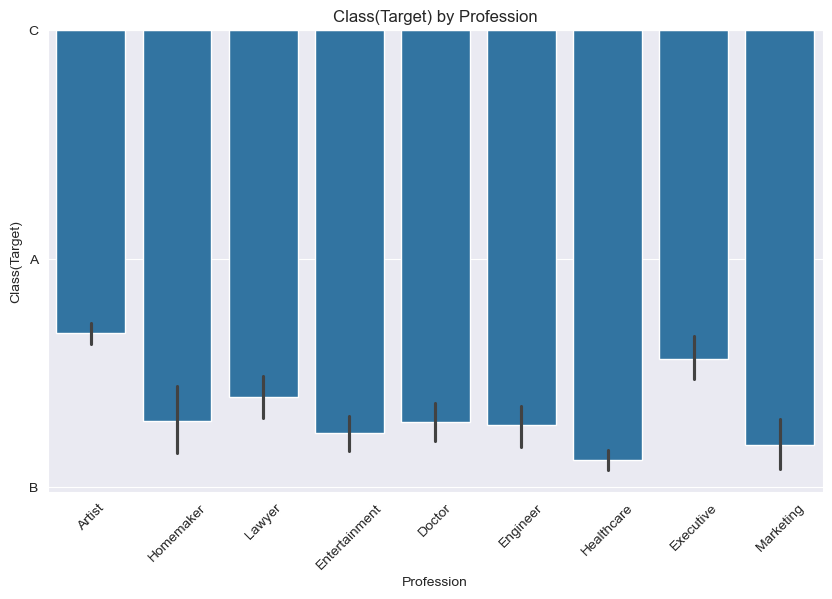

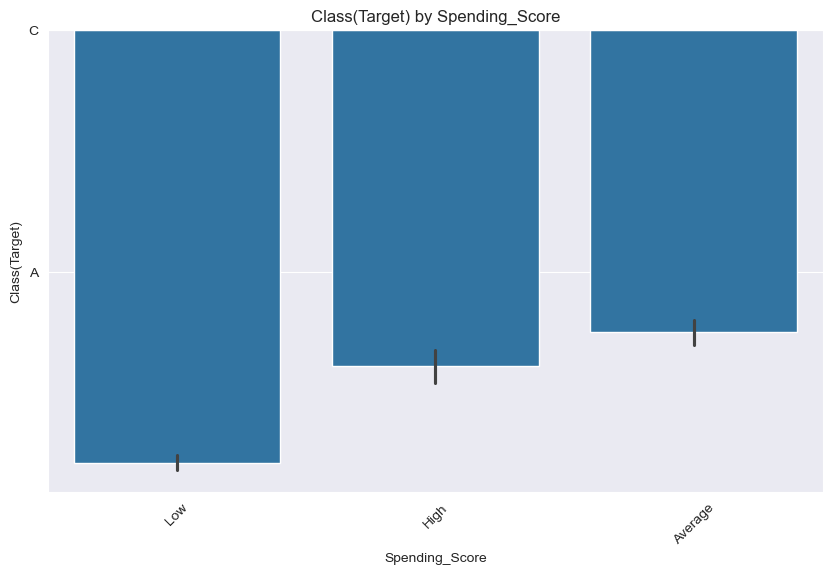

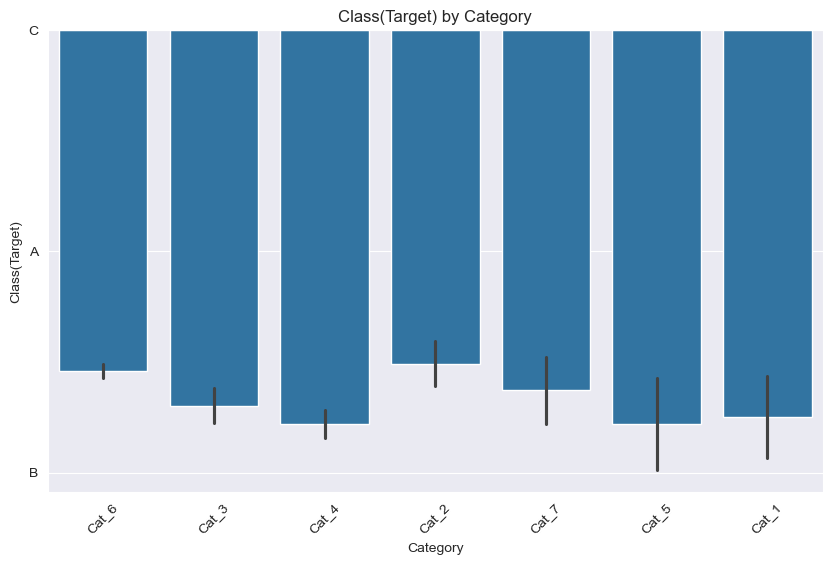


Basic Statistics Summary:
                ID      Married       Gender          Age     Graduate  \
count  7487.000000  7487.000000  7487.000000  7487.000000  7487.000000   
mean   3743.000000     0.548150     0.410578    43.398825     0.627488   
std    2161.455065     0.497709     0.491972    16.700082     0.483506   
min       0.000000     0.000000     0.000000    18.000000     0.000000   
25%    1871.500000     0.000000     0.000000    30.000000     0.000000   
50%    3743.000000     1.000000     0.000000    40.000000     1.000000   
75%    5614.500000     1.000000     1.000000    53.000000     1.000000   
max    7486.000000     1.000000     1.000000    89.000000     1.000000   

       Years_of_Working   Family_Members  
count        7487.000000     7487.000000  
mean            2.433418        2.798584  
std             3.242381        1.507230  
min             0.000000        1.000000  
25%             0.000000        2.000000  
50%             1.000000        2.000000  
75%  

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# # Set up the plotting style
# plt.style.use('seaborn')
# sns.set_palette("husl")

# 1. Analyze Numeric Features Distribution
def plot_numeric_distributions(df, ncols=3):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    nrows = int(np.ceil(len(numeric_cols) / ncols))
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
    axes = axes.flatten()
    
    for idx, col in enumerate(numeric_cols):
        sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
        axes[idx].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

# 2. Analyze Categorical Features Distribution
def plot_categorical_distributions(df, ncols=3):
    categorical_cols = df.select_dtypes(include=['object']).columns
    nrows = int(np.ceil(len(categorical_cols) / ncols))
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols):
        sns.countplot(data=df, x=col, ax=axes[idx])
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)
        axes[idx].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

# 3. Correlation Analysis
def plot_correlation_matrix(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numeric Features')
    plt.show()
    
    # Print high correlations (absolute value > 0.5)
    print("\nHigh correlations (|correlation| > 0.5):")
    high_corr = np.where(np.abs(corr_matrix) > 0.5)
    for i, j in zip(*high_corr):
        if i != j and i < j:  # Avoid diagonal and duplicate pairs
            print(f"{numeric_df.columns[i]} -- {numeric_df.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

# 4. Feature Analysis with Target Variable
def analyze_target_relationship(df, target):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Numeric features vs target
    for col in numeric_cols:
        if col != target:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=target, y=col)
            plt.title(f'{col} vs {target}')
            plt.show()
    
    # Categorical features vs target
    for col in categorical_cols:
        if col != target:
            plt.figure(figsize=(10, 6))
            sns.barplot(data=df, x=col, y=target)
            plt.xticks(rotation=45)
            plt.title(f'{target} by {col}')
            plt.show()

target = train_data["Class(Target)"]

# ... existing code ...

# Execute the analysis
print("Analyzing Feature Distributions...")
plot_numeric_distributions(train_data)
plot_categorical_distributions(train_data)

print("\nAnalyzing Feature Correlations...")
plot_correlation_matrix(train_data)

print("\nAnalyzing Relationships with Target Variable...")
# Fix: Pass the target column name as a string instead of the Series
analyze_target_relationship(train_data, "Class(Target)")

# Basic statistics summary
print("\nBasic Statistics Summary:")
print(train_data.describe())

In [58]:
 # data preprocessing

train_data = train_data.dropna(subset=['Class(Target)'])
# Separate features and target
X = train_data.drop(['ID', 'Class(Target)'], axis=1)
y = train_data['Class(Target)']

# Split validation data similarly
X_val = validate_data.drop(['ID', 'Class(Target)'], axis=1)
y_val = validate_data['Class(Target)']

# Prepare test data
X_test = test_data.drop(['ID', 'Class(Target)'], axis=1)



# Function to do onr-hot coding for categorical columns, and do standardization for numerical columns
def encode(X):
    # Define numeric features for standardization
    # Perform One-Hot Encoding on all categorical features
    X = pd.get_dummies(X, drop_first=False) 
    numeric_features = [
        'Married', 'Gender', 'Age', 
        'Graduate', 'Years_of_Working ', 
        'Family_Members'
    ]
    # Extract and standardize numeric features
    scaler = StandardScaler()
    X_numeric_scaled = scaler.fit_transform(X[numeric_features])

    # Convert standardized numeric features back to DataFrame
    X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features)

    # Concatenate standardized numeric features with One-Hot encoded categorical features
    X_final_scaled = pd.concat([X_numeric_scaled_df, X.drop(columns=numeric_features)], axis=1)
   

    return X_final_scaled

# Encode all datasets
# X_encoded, encoders = encode_categorical(X)
X_encoded = encode(X)
X_val_encoded = encode(X_val)
X_test_encoded =encode(X_test) 

# print(X_encoded)


In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score
# 
# 
# base_models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME'),
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
#     'SVM': SVC(probability=True, random_state=42),
#     'KNN': KNeighborsClassifier()
# }
# 
# param_distributions = {
#     'Random Forest': {
#         'n_estimators': [50, 100, 150, 200],
#         'max_depth': [5, 10, 20, None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 5]
#     },
#     'AdaBoost': {
#         'n_estimators': [50, 100, 200, 300],
#         'learning_rate': [0.01, 0.1, 0.5, 1.0],
#         'estimator': [DecisionTreeClassifier(max_depth=d, random_state=42) for d in [1, 2, 3, 5]]
#     },
#     'Decision Tree': {
#         'max_depth': [3, 5, 10, 20, None],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 5],
#         'criterion': ['gini', 'entropy']
#     },
#     'Logistic Regression': {
#         'C': [0.1, 1, 10, 100],
#         'penalty': ['l1', 'l2'],
#         'solver': ['liblinear'] 
#     },
#     'SVM': {
#         'C': [0.1, 1, 10],
#         'kernel': ['rbf', 'linear', 'sigmoid'],
#         'gamma': ['scale', 'auto']
#     },
#     'KNN': {
#         'n_neighbors': [3, 5, 7, 10, 15],
#         'weights': ['uniform', 'distance'],
#         'metric': ['euclidean', 'manhattan']
#     }
# }
# 
# best_models = {}
# scoring_metric = 'accuracy'
# 
# for model_name, model in base_models.items():
#     print(f"\n### Tuning Hyperparameters for {model_name} ###")
#     param_dist = param_distributions[model_name]
# 
#     random_search = RandomizedSearchCV(
#         estimator=model,
#         param_distributions=param_dist,
#         n_iter=20,  
#         scoring=scoring_metric,
#         cv=5,       
#         n_jobs=-1,
#         verbose=1,
#         random_state=42
#     )
# 
#     random_search.fit(X_encoded, y)
#     print(f"Best Params for {model_name}: {random_search.best_params_}")
#     print(f"Best {scoring_metric} Score on Training set (CV): {random_search.best_score_:.4f}")
# 
#     y_val_pred = random_search.best_estimator_.predict(X_val_encoded)
#     print(f"\nValidation Set Performance for {model_name} with best params:")
#     print(classification_report(y_val, y_val_pred))
# 
#     best_models[model_name] = random_search.best_estimator_
# 
# print("\n##### Summary of Best Models Performance on Validation Set #####")
# for model_name, model in best_models.items():
#     y_val_pred = model.predict(X_val_encoded)
#     print(f"{model_name}: scores on validation set: {accuracy_score(y_val, y_val_pred):.4f}")


In [60]:
# 4. Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        min_samples_split=2,
        min_samples_leaf=5,
        max_depth=None,
        random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=50,
        learning_rate=0.1,
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        min_samples_split=2,
        min_samples_leaf=2,
        max_depth=5,
        criterion='gini',
        random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        solver='liblinear',
        penalty='l1',
        C=1,
        random_state=42,
        max_iter=1000
    ),
    'SVM': SVC(
        kernel='rbf',
        gamma='scale',
        C=1,
        probability=True,
        random_state=42
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=15,
        weights='uniform',
        metric='manhattan'
    )
}

# Dictionary to store model performances
model_performances = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    try:
        # Fit model
        model.fit(X_encoded, y)
        
        # Cross-validation score
        cv_scores = cross_val_score(model, X_encoded, y, cv=5)
        
        # Predictions on validation set
        y_pred = model.predict(X_val_encoded)
        
        # Store performance metrics
        model_performances[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'validation_report': classification_report(y_val, y_pred)
        }

        

        
        print(f"Cross-validation accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
        print("\nValidation Set Performance:")
        print(classification_report(y_val, y_pred))
        print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
        
        # # Plot confusion matrix
        # plt.figure(figsize=(8, 6))
        # cm = confusion_matrix(y_val, y_pred)
        # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        # plt.title(f'Confusion Matrix - {name}')
        # plt.ylabel('True Label')
        # plt.xlabel('Predicted Label')
        # plt.show()
        
    except Exception as e:
        print(f"Error training {name}: {str(e)}")
        continue


Training Random Forest...
Cross-validation accuracy: 0.485 (+/- 0.017)

Validation Set Performance:
              precision    recall  f1-score   support

           A       0.45      0.50      0.48       241
           B       0.55      0.71      0.62       271
           C       0.42      0.26      0.32       269
           D       0.44      0.45      0.45       288

    accuracy                           0.48      1069
   macro avg       0.47      0.48      0.47      1069
weighted avg       0.47      0.48      0.47      1069

Accuracy: 0.4790

Training AdaBoost...


/Users/tianyu/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tianyu/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tianyu/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tianyu/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Cross-validation accuracy: 0.466 (+/- 0.014)

Validation Set Performance:
              precision    recall  f1-score   support

           A       0.41      0.60      0.49       241
           B       0.58      0.66      0.62       271
           C       0.39      0.05      0.09       269
           D       0.41      0.52      0.46       288

    accuracy                           0.46      1069
   macro avg       0.45      0.46      0.41      1069
weighted avg       0.45      0.46      0.41      1069

Accuracy: 0.4574

Training Decision Tree...
Cross-validation accuracy: 0.472 (+/- 0.006)

Validation Set Performance:
              precision    recall  f1-score   support

           A       0.43      0.53      0.48       241
           B       0.58      0.65      0.61       271
           C       0.40      0.19      0.26       269
           D       0.42      0.50      0.46       288

    accuracy                           0.47      1069
   macro avg       0.46      0.47      0.45    

In [61]:
# ... existing code ...

import joblib

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        min_samples_split=2,
        min_samples_leaf=5,
        max_depth=None,
        random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=50,
        learning_rate=0.1,
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        min_samples_split=2,
        min_samples_leaf=2,
        max_depth=5,
        criterion='gini',
        random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        solver='liblinear',
        penalty='l1',
        C=1,
        random_state=42,
        max_iter=1000
    ),
    'SVM': SVC(
        kernel='rbf',
        gamma='scale',
        C=1,
        probability=True,
        random_state=42
    ),
    'KNN': KNeighborsClassifier(
        n_neighbors=15,
        weights='uniform',
        metric='manhattan'
    )
}

# Dictionary to store model performances
model_performances = {}
best_model_name = None
best_cv_score = 0

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    try:
        # Fit model
        model.fit(X_encoded, y)

        # Save the trained model
        joblib.dump(model, f"{name}_model.pkl")

        # Cross-validation score
        cv_scores = cross_val_score(model, X_encoded, y, cv=5)

        # Predictions on validation set
        y_pred = model.predict(X_val_encoded)

        # Store performance metrics
        model_performances[name] = {
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std(),
            'validation_report': classification_report(y_val, y_pred)
        }

        # Check if this model is the best so far
        if cv_scores.mean() > best_cv_score:
            best_cv_score = cv_scores.mean()
            best_model_name = name

        print(f"Cross-validation accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
        print("\nValidation Set Performance:")
        print(classification_report(y_val, y_pred))

    except Exception as e:
        print(f"Error training {name}: {str(e)}")
        continue

# Load the best model and predict the test dataset
if best_model_name:
    print(f"\nBest model: {best_model_name} with CV score: {best_cv_score:.3f}")
    best_model = joblib.load(f"{best_model_name}_model.pkl")
    test_predictions = best_model.predict(X_test_encoded)
    print("\nTest Predictions:")
    print(test_predictions)


Training Random Forest...
Cross-validation accuracy: 0.485 (+/- 0.017)

Validation Set Performance:
              precision    recall  f1-score   support

           A       0.45      0.50      0.48       241
           B       0.55      0.71      0.62       271
           C       0.42      0.26      0.32       269
           D       0.44      0.45      0.45       288

    accuracy                           0.48      1069
   macro avg       0.47      0.48      0.47      1069
weighted avg       0.47      0.48      0.47      1069


Training AdaBoost...


/Users/tianyu/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tianyu/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tianyu/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/tianyu/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Cross-validation accuracy: 0.466 (+/- 0.014)

Validation Set Performance:
              precision    recall  f1-score   support

           A       0.41      0.60      0.49       241
           B       0.58      0.66      0.62       271
           C       0.39      0.05      0.09       269
           D       0.41      0.52      0.46       288

    accuracy                           0.46      1069
   macro avg       0.45      0.46      0.41      1069
weighted avg       0.45      0.46      0.41      1069


Training Decision Tree...
Cross-validation accuracy: 0.472 (+/- 0.006)

Validation Set Performance:
              precision    recall  f1-score   support

           A       0.43      0.53      0.48       241
           B       0.58      0.65      0.61       271
           C       0.40      0.19      0.26       269
           D       0.42      0.50      0.46       288

    accuracy                           0.47      1069
   macro avg       0.46      0.47      0.45      1069
weighted a

In [62]:
# Instead of overwriting Test.csv, save to a new file
test_df = pd.read_csv('Test.csv')
test_df['Class(Target)'] = test_predictions

# Save to a new file with predictions
test_df.to_csv('Test_new_predictions.csv', index=False)

# Display the first few rows to verify
test_df.head()

,ID,Married,Gender,Age,Graduate,Profession,Years_of_Working,Spending_Score,Family_Members,Category,Class(Target)
0,8556,1,1.0,29,0.0,Marketing,8.0,Low,5.0,Cat_6,B
1,8557,0,0.0,46,1.0,NaN,NaN,Average,3.0,Cat_6,A
2,8558,0,0.0,26,0.0,Entertainment,1.0,Low,3.0,Cat_6,B
3,8559,0,1.0,19,1.0,Artist,0.0,Low,2.0,Cat_6,B
4,8560,0,1.0,36,1.0,Artist,10.0,Low,1.0,Cat_6,D
